## Unsupervised learning
### Iris flowers clustering
This study we try to clustering Iris Dataset used Kmeans

### Iris dataset
Source: https://archive-beta.ics.uci.edu/dataset/53/iris

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

ATTRIBUTES:
- sepal length - Feature - Continuous - cm
- sepal width - Feature - Continuous - cm
- petal length - Feature - Continuous - cm
- petal width - Feature - Continuous- cm
- class - Target - Categorical - class of iris plant

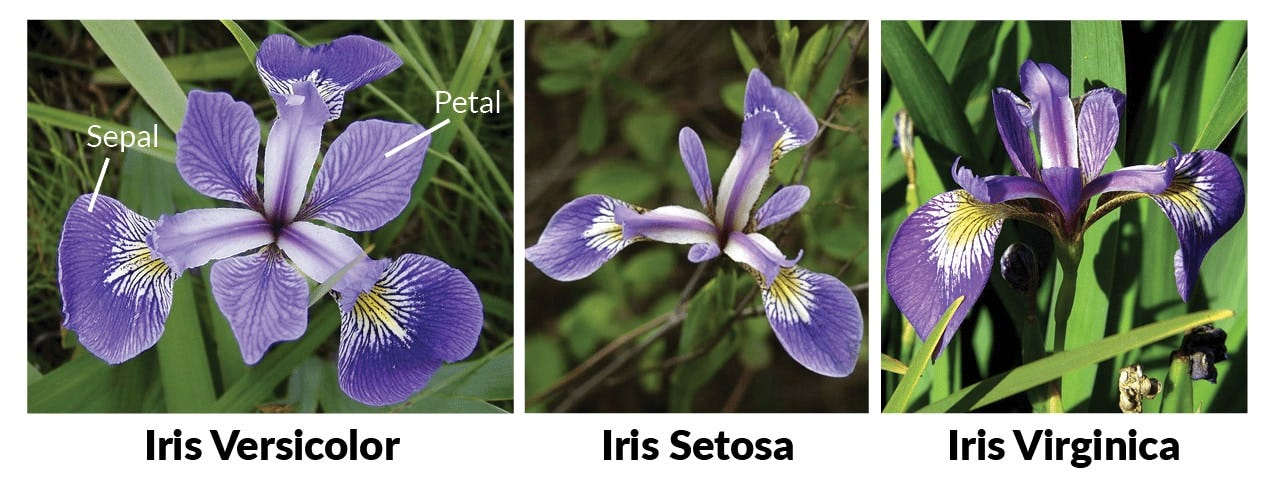

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

Example based on:
https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset

### Import libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

### Import and analyse dataset

In [23]:
iris = pd.read_csv("../data/raw/iris.data")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [24]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
# Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [26]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

### Explonatory data analysis

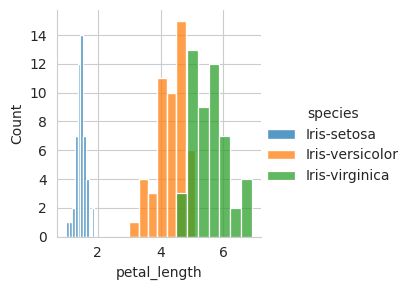

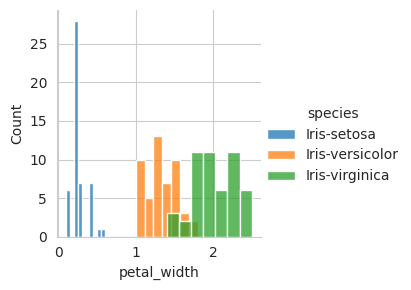

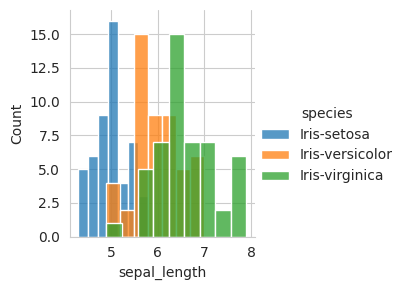

In [27]:
# display distributions by features
sns.FacetGrid(iris,hue="species", height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species", height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species", height=3).map(sns.histplot,"sepal_length").add_legend()
plt.show()

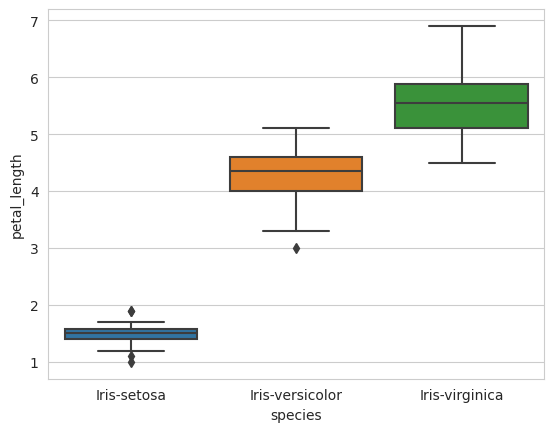

In [29]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

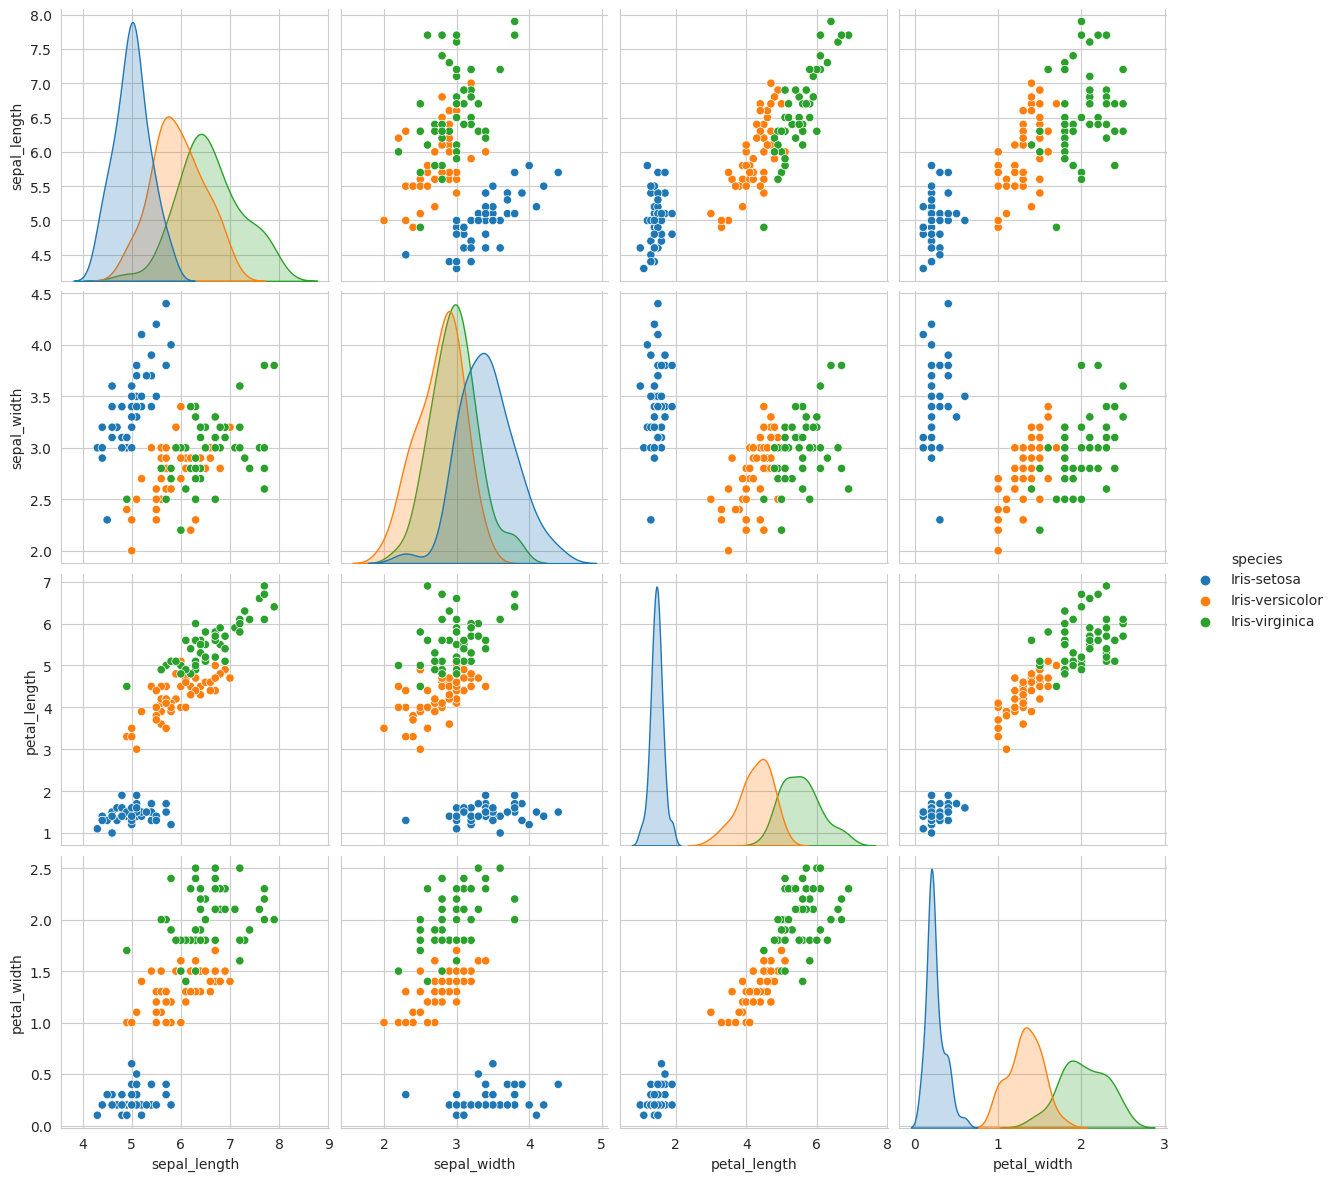

In [30]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

## Clustering

Use K-means to cluster flowers.

Process:
- Choose the number of clusters k
- Select k random points from the data as centroids
- Assign all the points to the closest cluster centroid
- Recompute the centroids of newly formed clusters
- Repeat steps 3 and 4

### Find optimal number of clusters

In [35]:
# fit data using 1 to 10 clusters
# fitting learns the clusters on train data
wcss = []

for i in range(1, 11):
    kmeans = KMeans( \
        n_clusters = i \
        , init = 'k-means++' # Initialize the centroids to be distant from each other \
        , max_iter = 300 # Maximum number of iterations for a single run \
        , n_init = 10 # Number of times the k-means algorithm is run with different centroid seeds \
        , random_state = 0) # determines random number generation for centroid initialization; 0 to make it deterministic \
    kmeans.fit(x) # Compute k-means clustering \
    wcss.append(kmeans.inertia_) # Sum of squared distances of samples to their closest cluster center

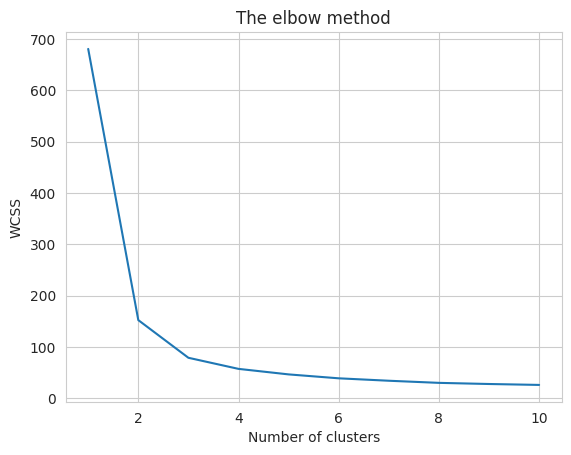

In [36]:
# Use the elbow method to determine the optimal number of clusters

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

### Implement K-Means with 3 clusters

In [37]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x) # Compute cluster centers and predict cluster index for each sample

### Visualise the clusters

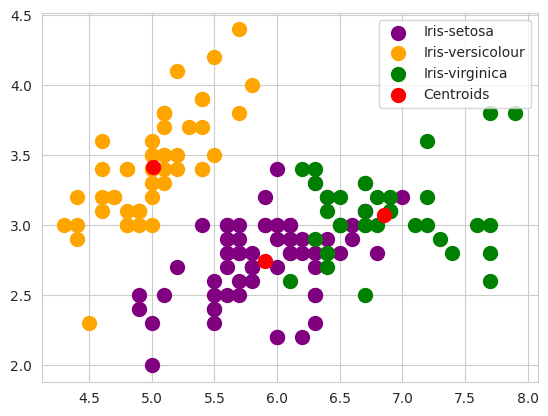

In [38]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()